In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import gc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [4]:
# Cargar los datos
files = ["datosTP2/ctr_15.csv", "datosTP2/ctr_16.csv", "datosTP2/ctr_17.csv", "datosTP2/ctr_18.csv", "datosTP2/ctr_19.csv", "datosTP2/ctr_20.csv", "datosTP2/ctr_21.csv"]
data = pd.concat([pd.read_csv(f) for f in files])



In [7]:
# Mostrar las primeras filas del dataset
#print("Primeras 5 filas del dataset:")print(data.head())

In [8]:
# Revisar tipos de datos
#print("\nTipos de datos en el dataset:")
#print(data.dtypes)

In [9]:
# Verificar si hay valores nulos en las columnas
#print("\nConteo de valores nulos:")
#print(data.isnull().sum())

In [10]:
# Describir las columnas numéricas
#print("\nDescripción estadística de las columnas numéricas:")
#print(data.describe())


In [11]:
# Distribución de la variable objetivo (Label)
'''
 print("\nDistribución de la variable objetivo (Label):")
sns.countplot(data['Label'])
plt.title('Distribución de la variable objetivo')
plt.show()
'''

'\n print("\nDistribución de la variable objetivo (Label):")\nsns.countplot(data[\'Label\'])\nplt.title(\'Distribución de la variable objetivo\')\nplt.show()\n'


Distribución de las variables numéricas:


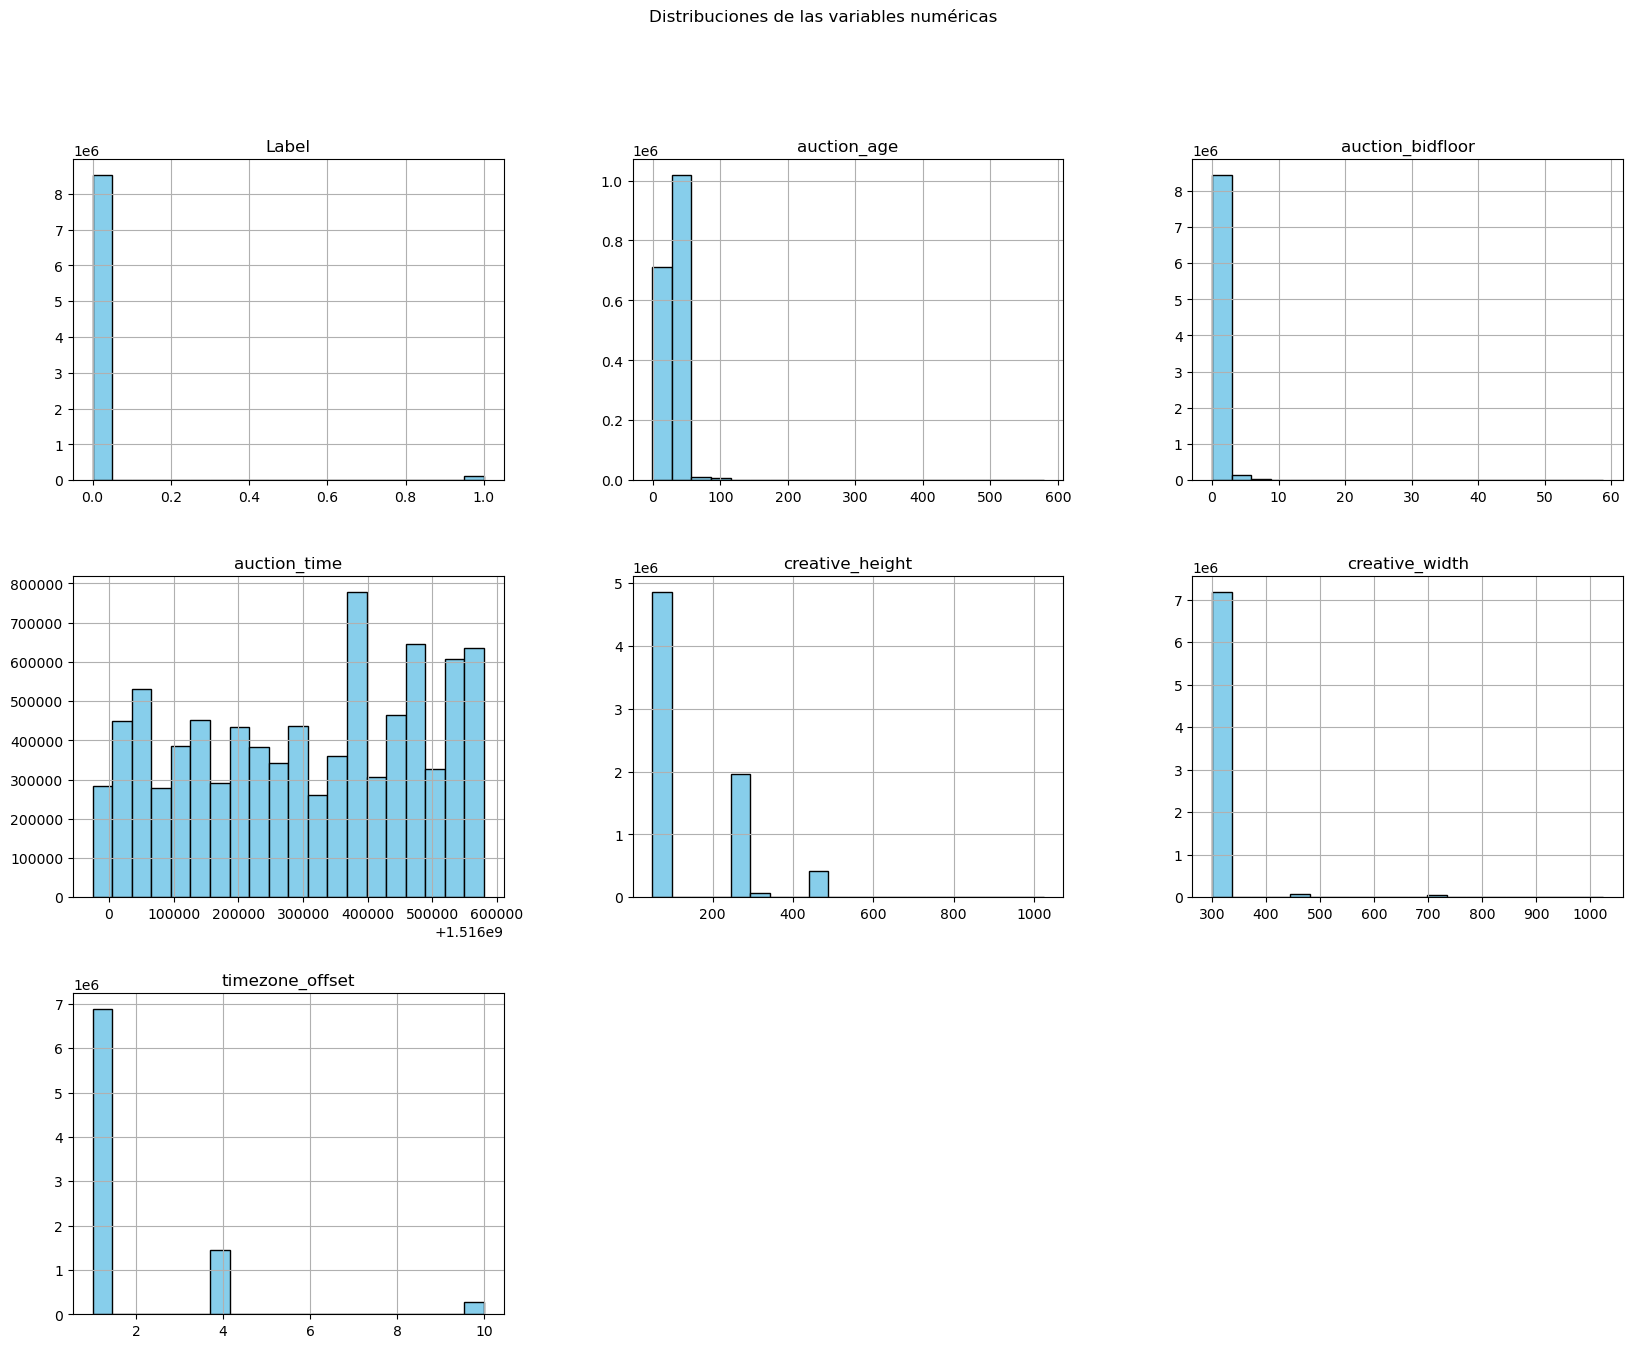

In [12]:
# Distribución de las variables numéricas
print("\nDistribución de las variables numéricas:")
num_columns = data.select_dtypes(include=np.number).columns
data[num_columns].hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Distribuciones de las variables numéricas')
plt.show()


Matriz de correlación entre variables numéricas:


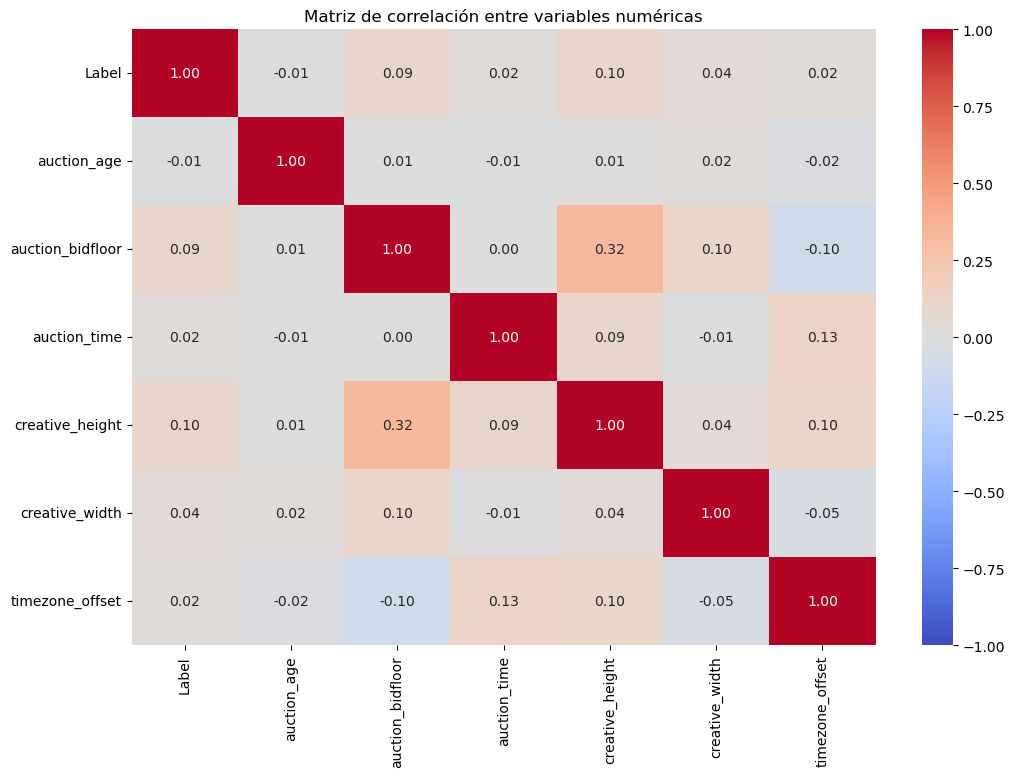

In [13]:
# Analizar correlación entre variables numéricas
print("\nMatriz de correlación entre variables numéricas:")
corr_matrix = data[num_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()



Análisis de 'auction_bidfloor' en relación a 'Label':


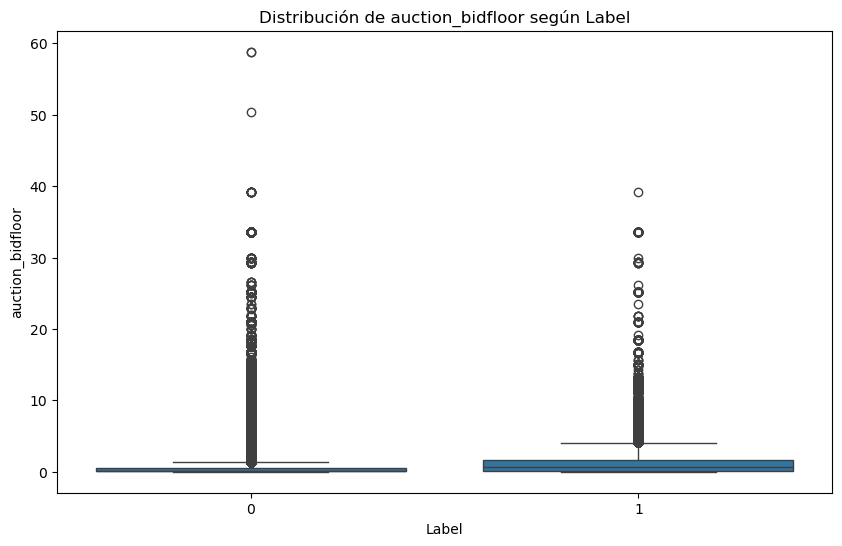

In [17]:
# Análisis de la variable 'auction_bidfloor' respecto a la variable objetivo
print("\nAnálisis de 'auction_bidfloor' en relación a 'Label':")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='auction_bidfloor', data=data)
plt.title('Distribución de auction_bidfloor según Label')
plt.show()




Análisis de 'auction_time' en relación a 'Label':


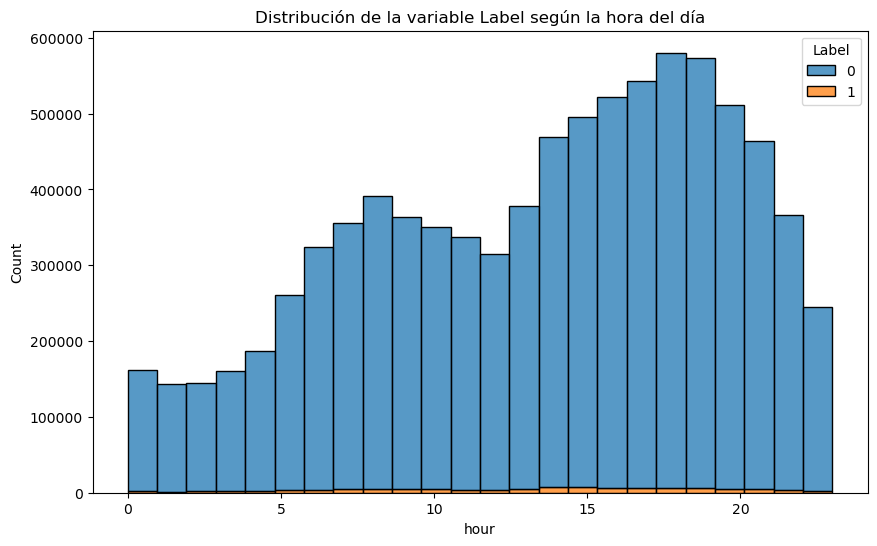

In [20]:
# Análisis de la variable 'auction_time' (convertir tiempo de Unix a datetime)
print("\nAnálisis de 'auction_time' en relación a 'Label':")
data['auction_time'] = pd.to_datetime(data['auction_time'], unit='s')  # Convertir de Unix a datetime
plt.figure(figsize=(10, 6))
data['hour'] = data['auction_time'].dt.hour
sns.histplot(data=data, x='hour', hue='Label', multiple='stack', bins=24)
plt.title('Distribución de la variable Label según la hora del día')
plt.show()


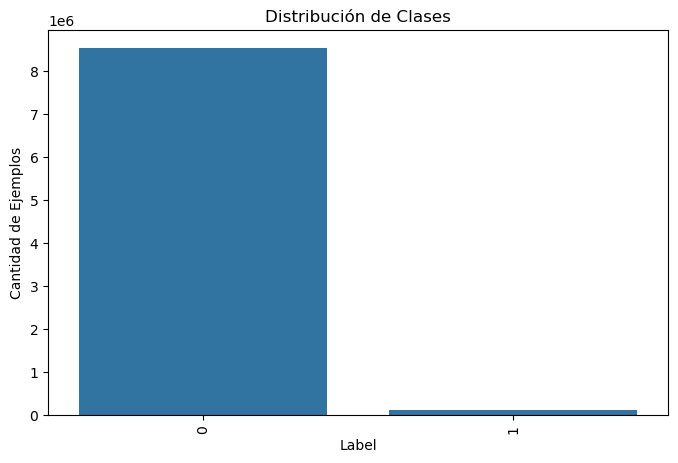

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de ejemplos en cada clase
class_counts = data['Label'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribución de Clases')
plt.xlabel('Label')
plt.ylabel('Cantidad de Ejemplos')
plt.xticks(rotation=90)
plt.show()


In [2]:

# Separar la variable objetivo y las características
y = data["Label"]
X = data.drop(columns=["Label"])


NameError: name 'data' is not defined

In [35]:
# Contar las ocurrencias de cada clase
label_counts = data["Label"].value_counts()
print(label_counts)


Label
0    8539062
1     105530
Name: count, dtype: int64


In [37]:
# Contar las ocurrencias de cada clase
label_counts = data["Label"].value_counts()
print(label_counts)
min_count = label_counts.min()
# Crear un DataFrame vacío para almacenar los datos balanceados
balanced_data = pd.DataFrame()

# Iterar sobre cada clase y muestrear
for label in label_counts.index:
    label_data = data[data["Label"] == label]  # Filtrar por clase
    sampled_data = label_data.sample(n=min_count, random_state=2345)  # Muestrear
    balanced_data = pd.concat([balanced_data, sampled_data])  # Concatenar al DataFrame balanceado

# Resetear el índice
balanced_data.reset_index(drop=True, inplace=True)



In [38]:
print(balanced_data["Label"].value_counts())

Label
0    105530
1    105530
Name: count, dtype: int64


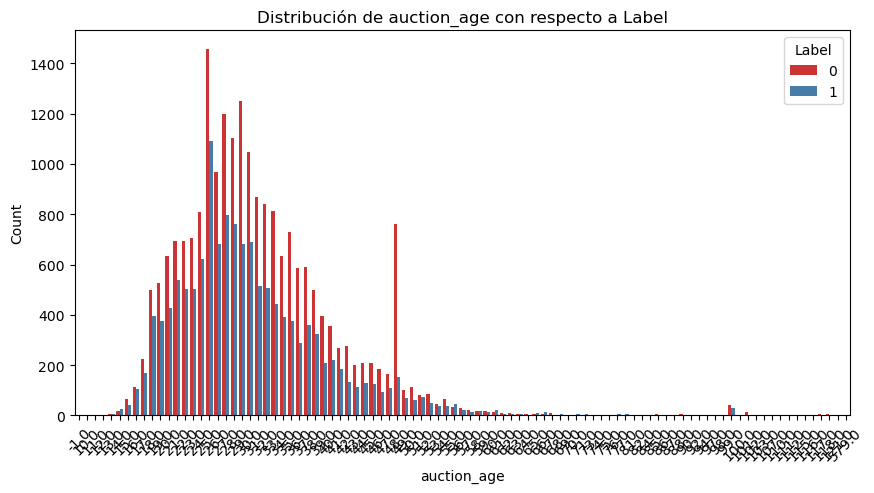

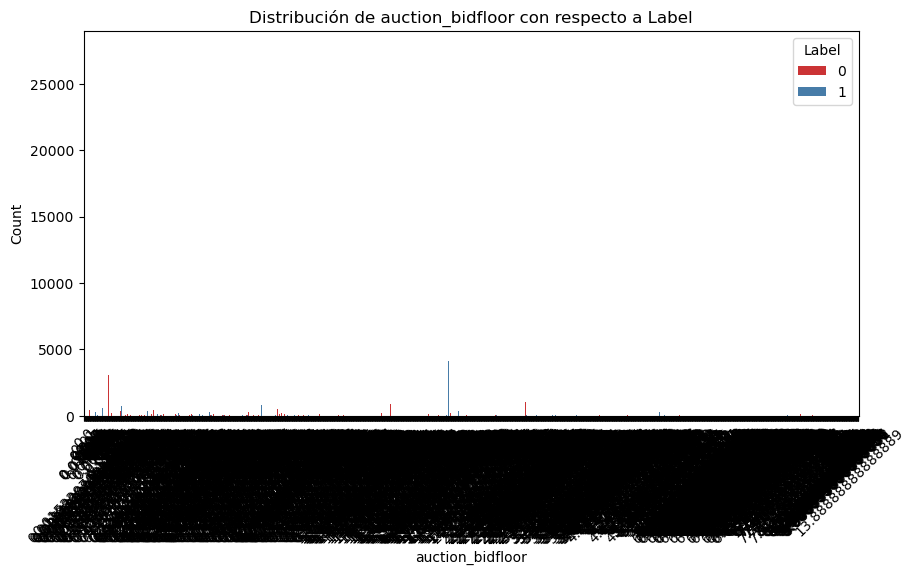

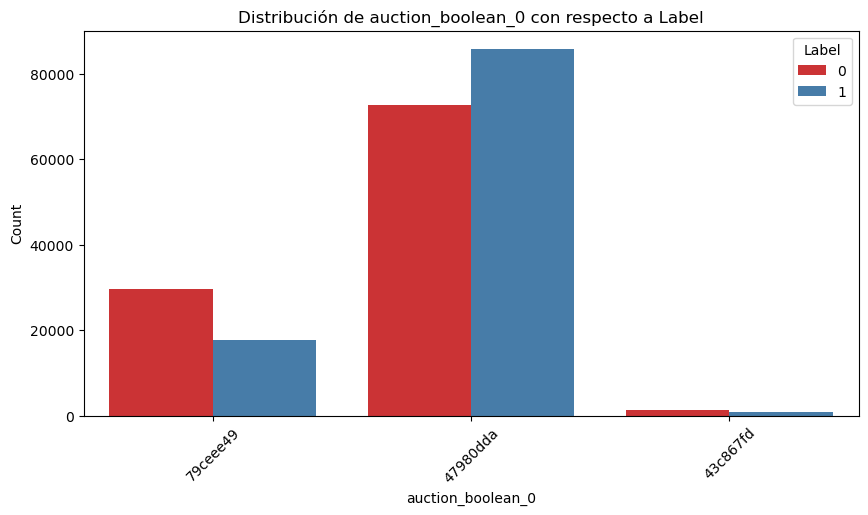

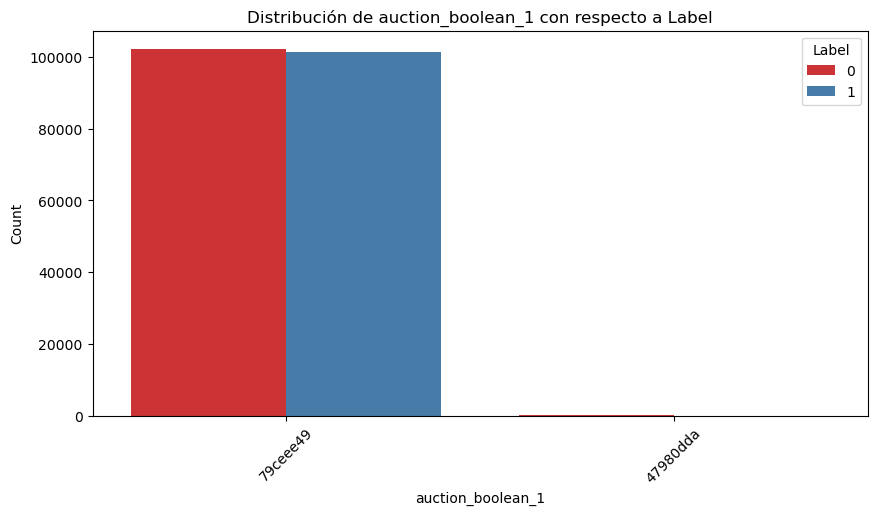

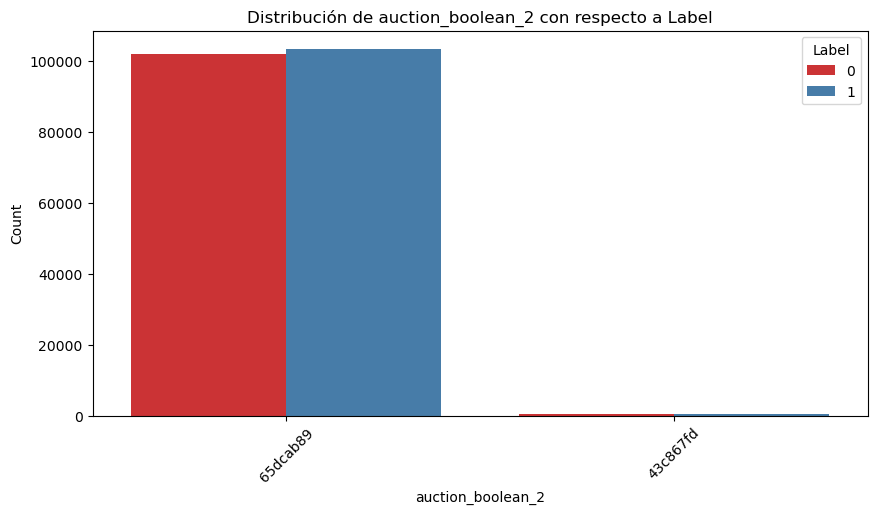

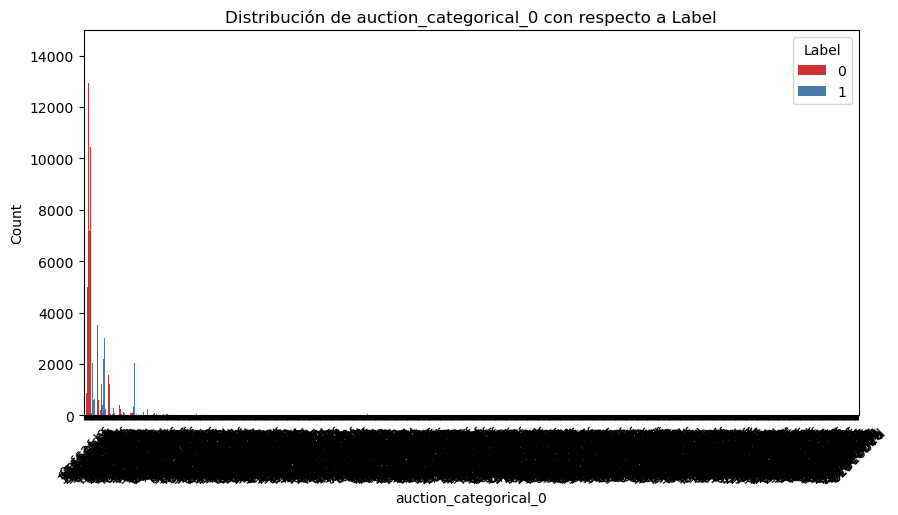

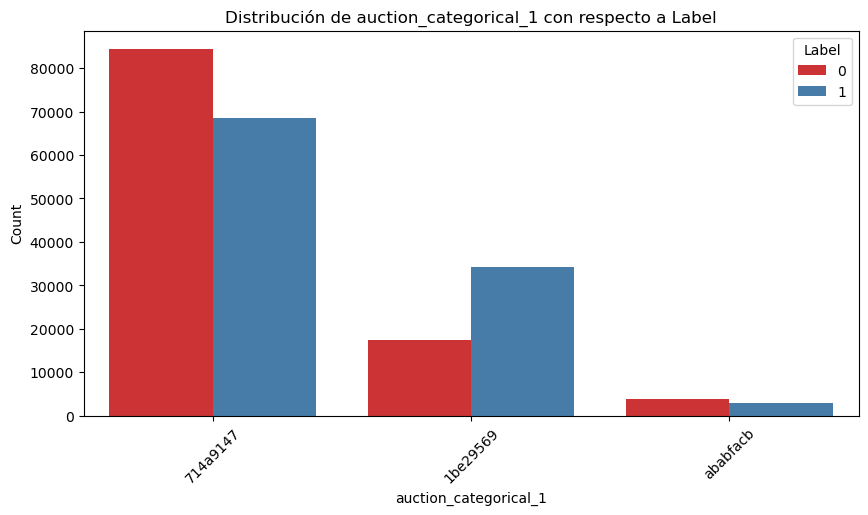

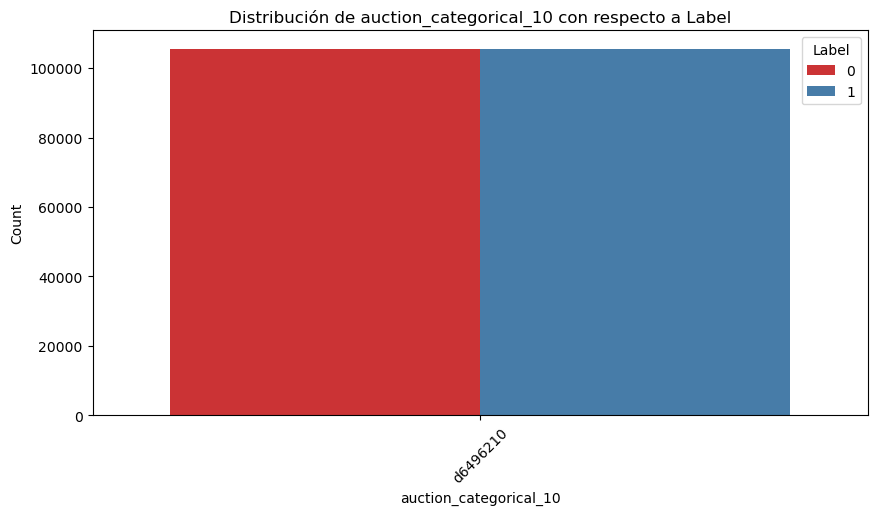

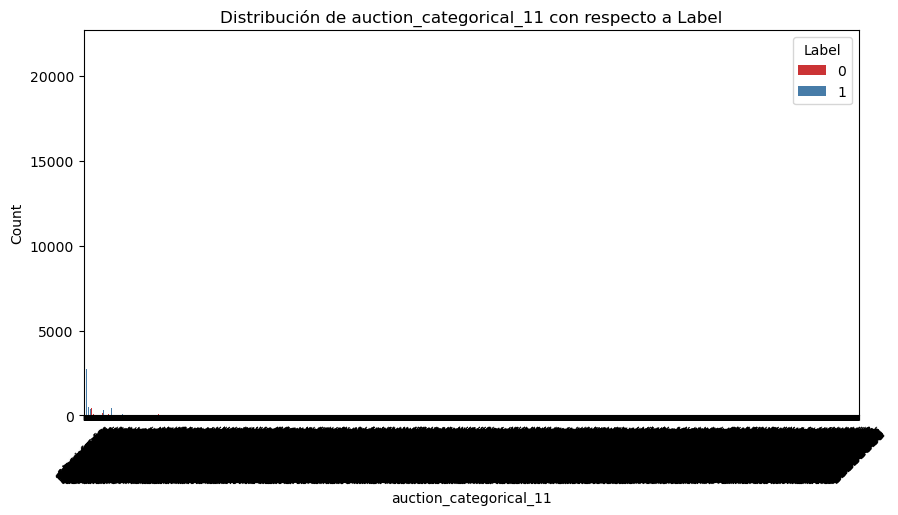

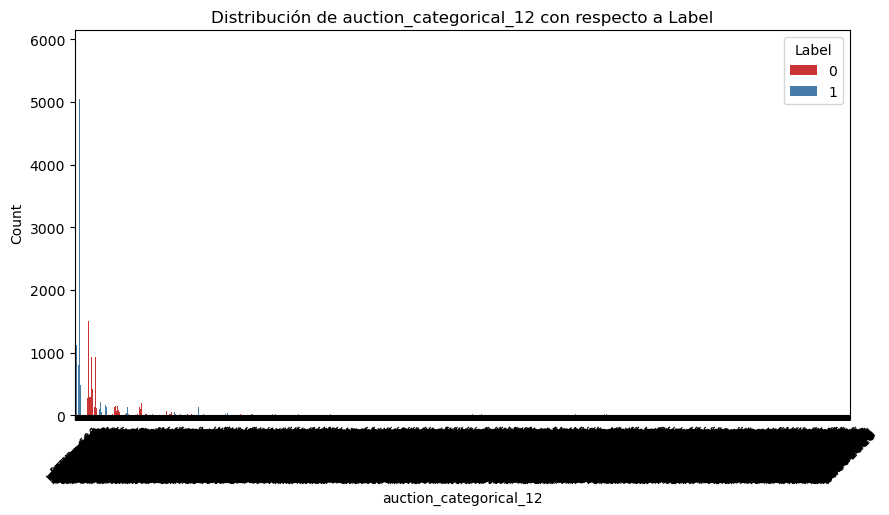

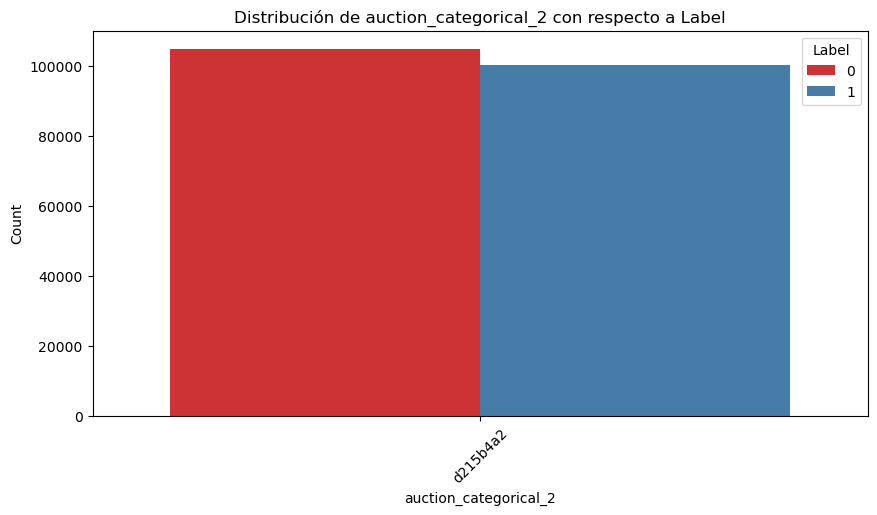

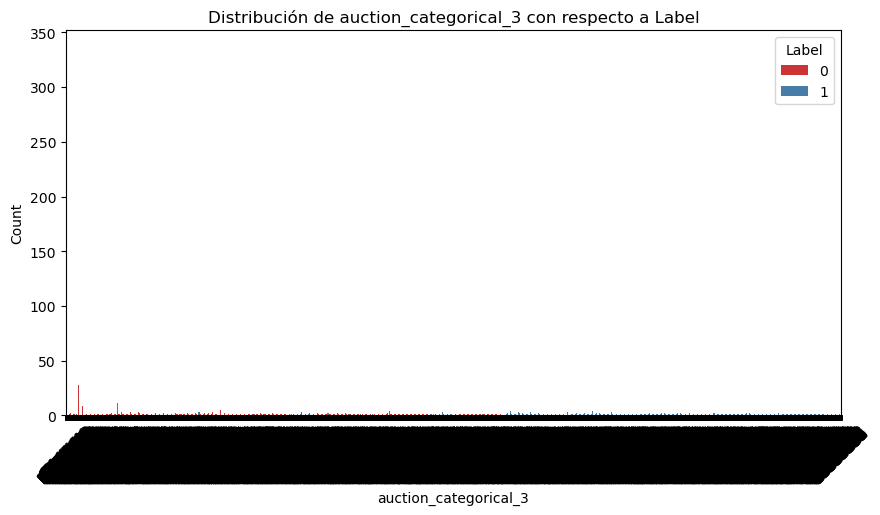

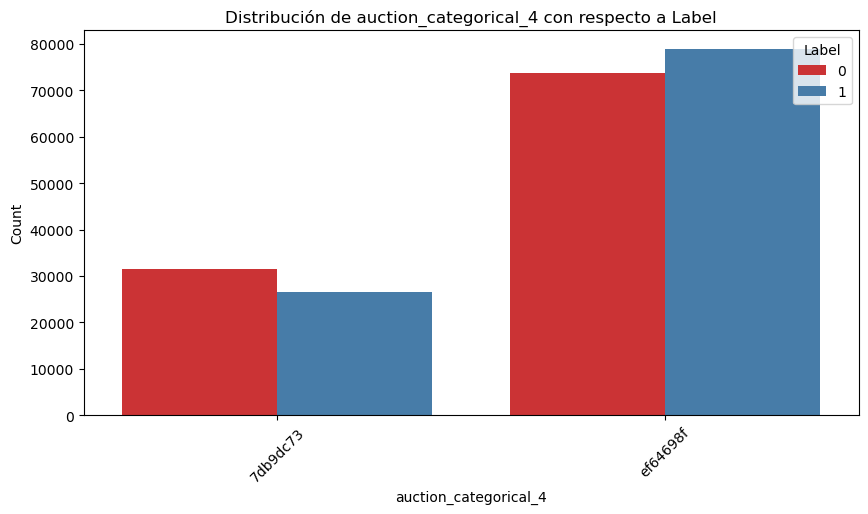

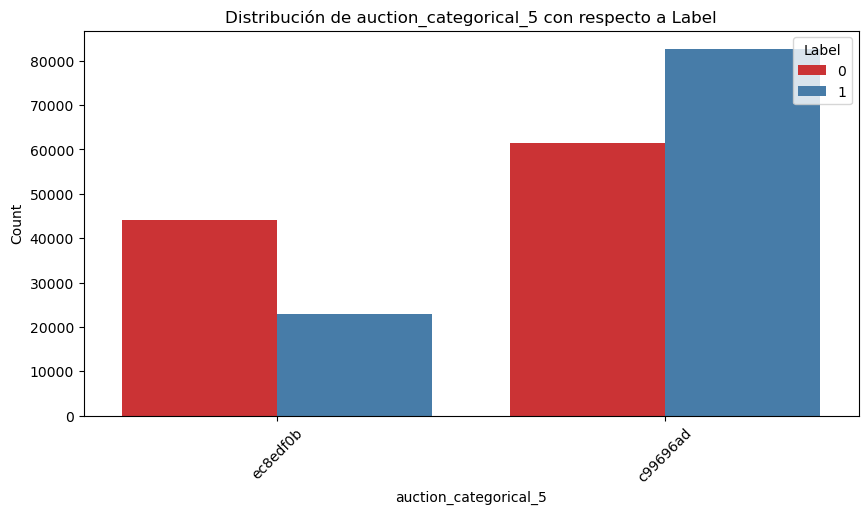

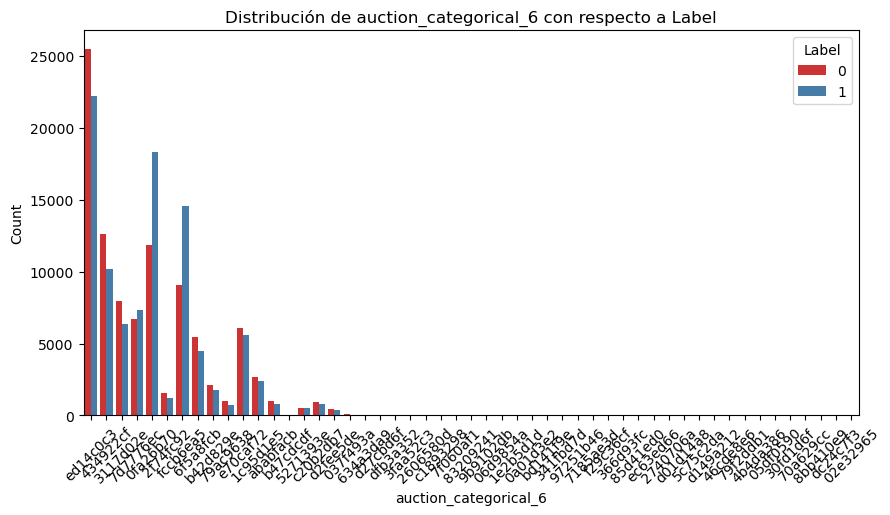

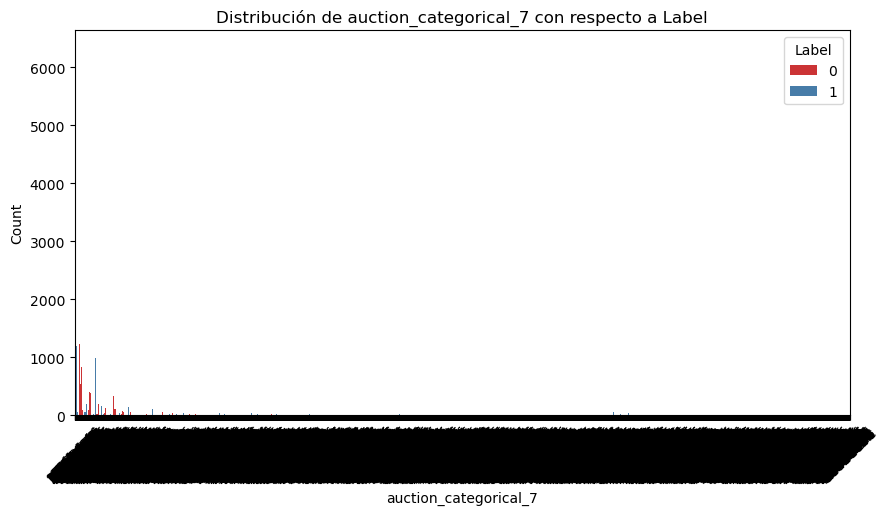

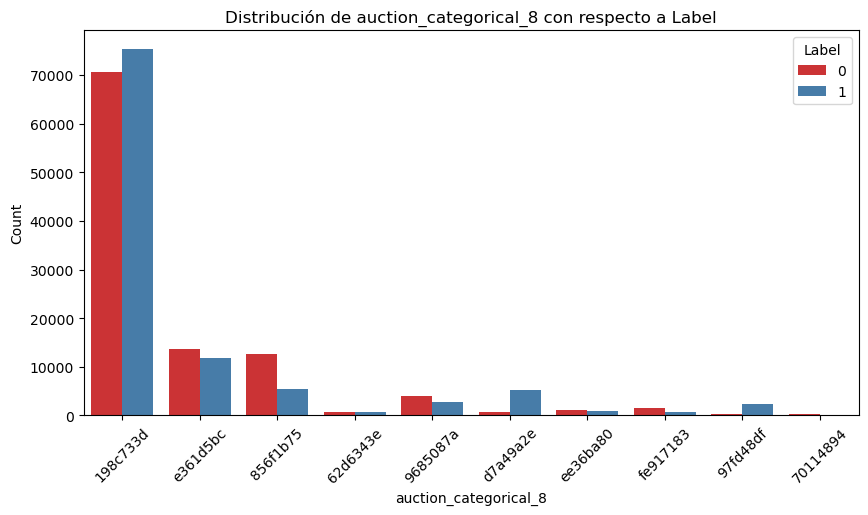

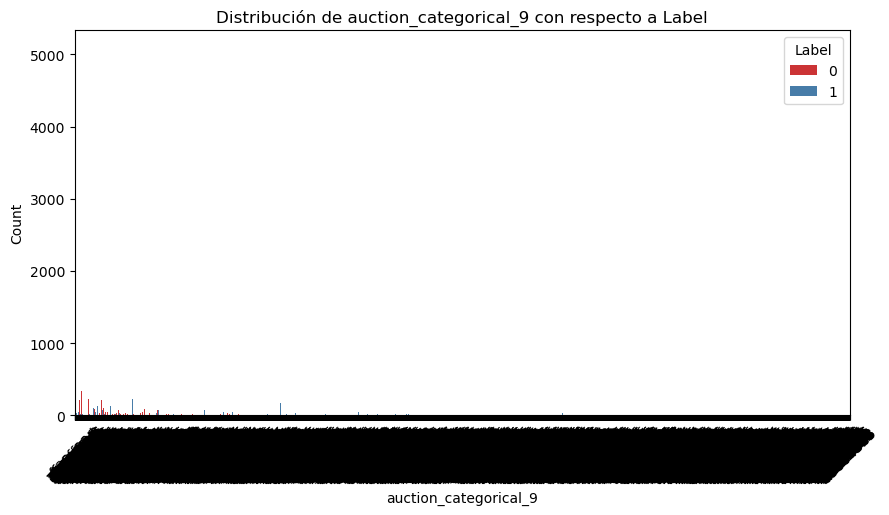

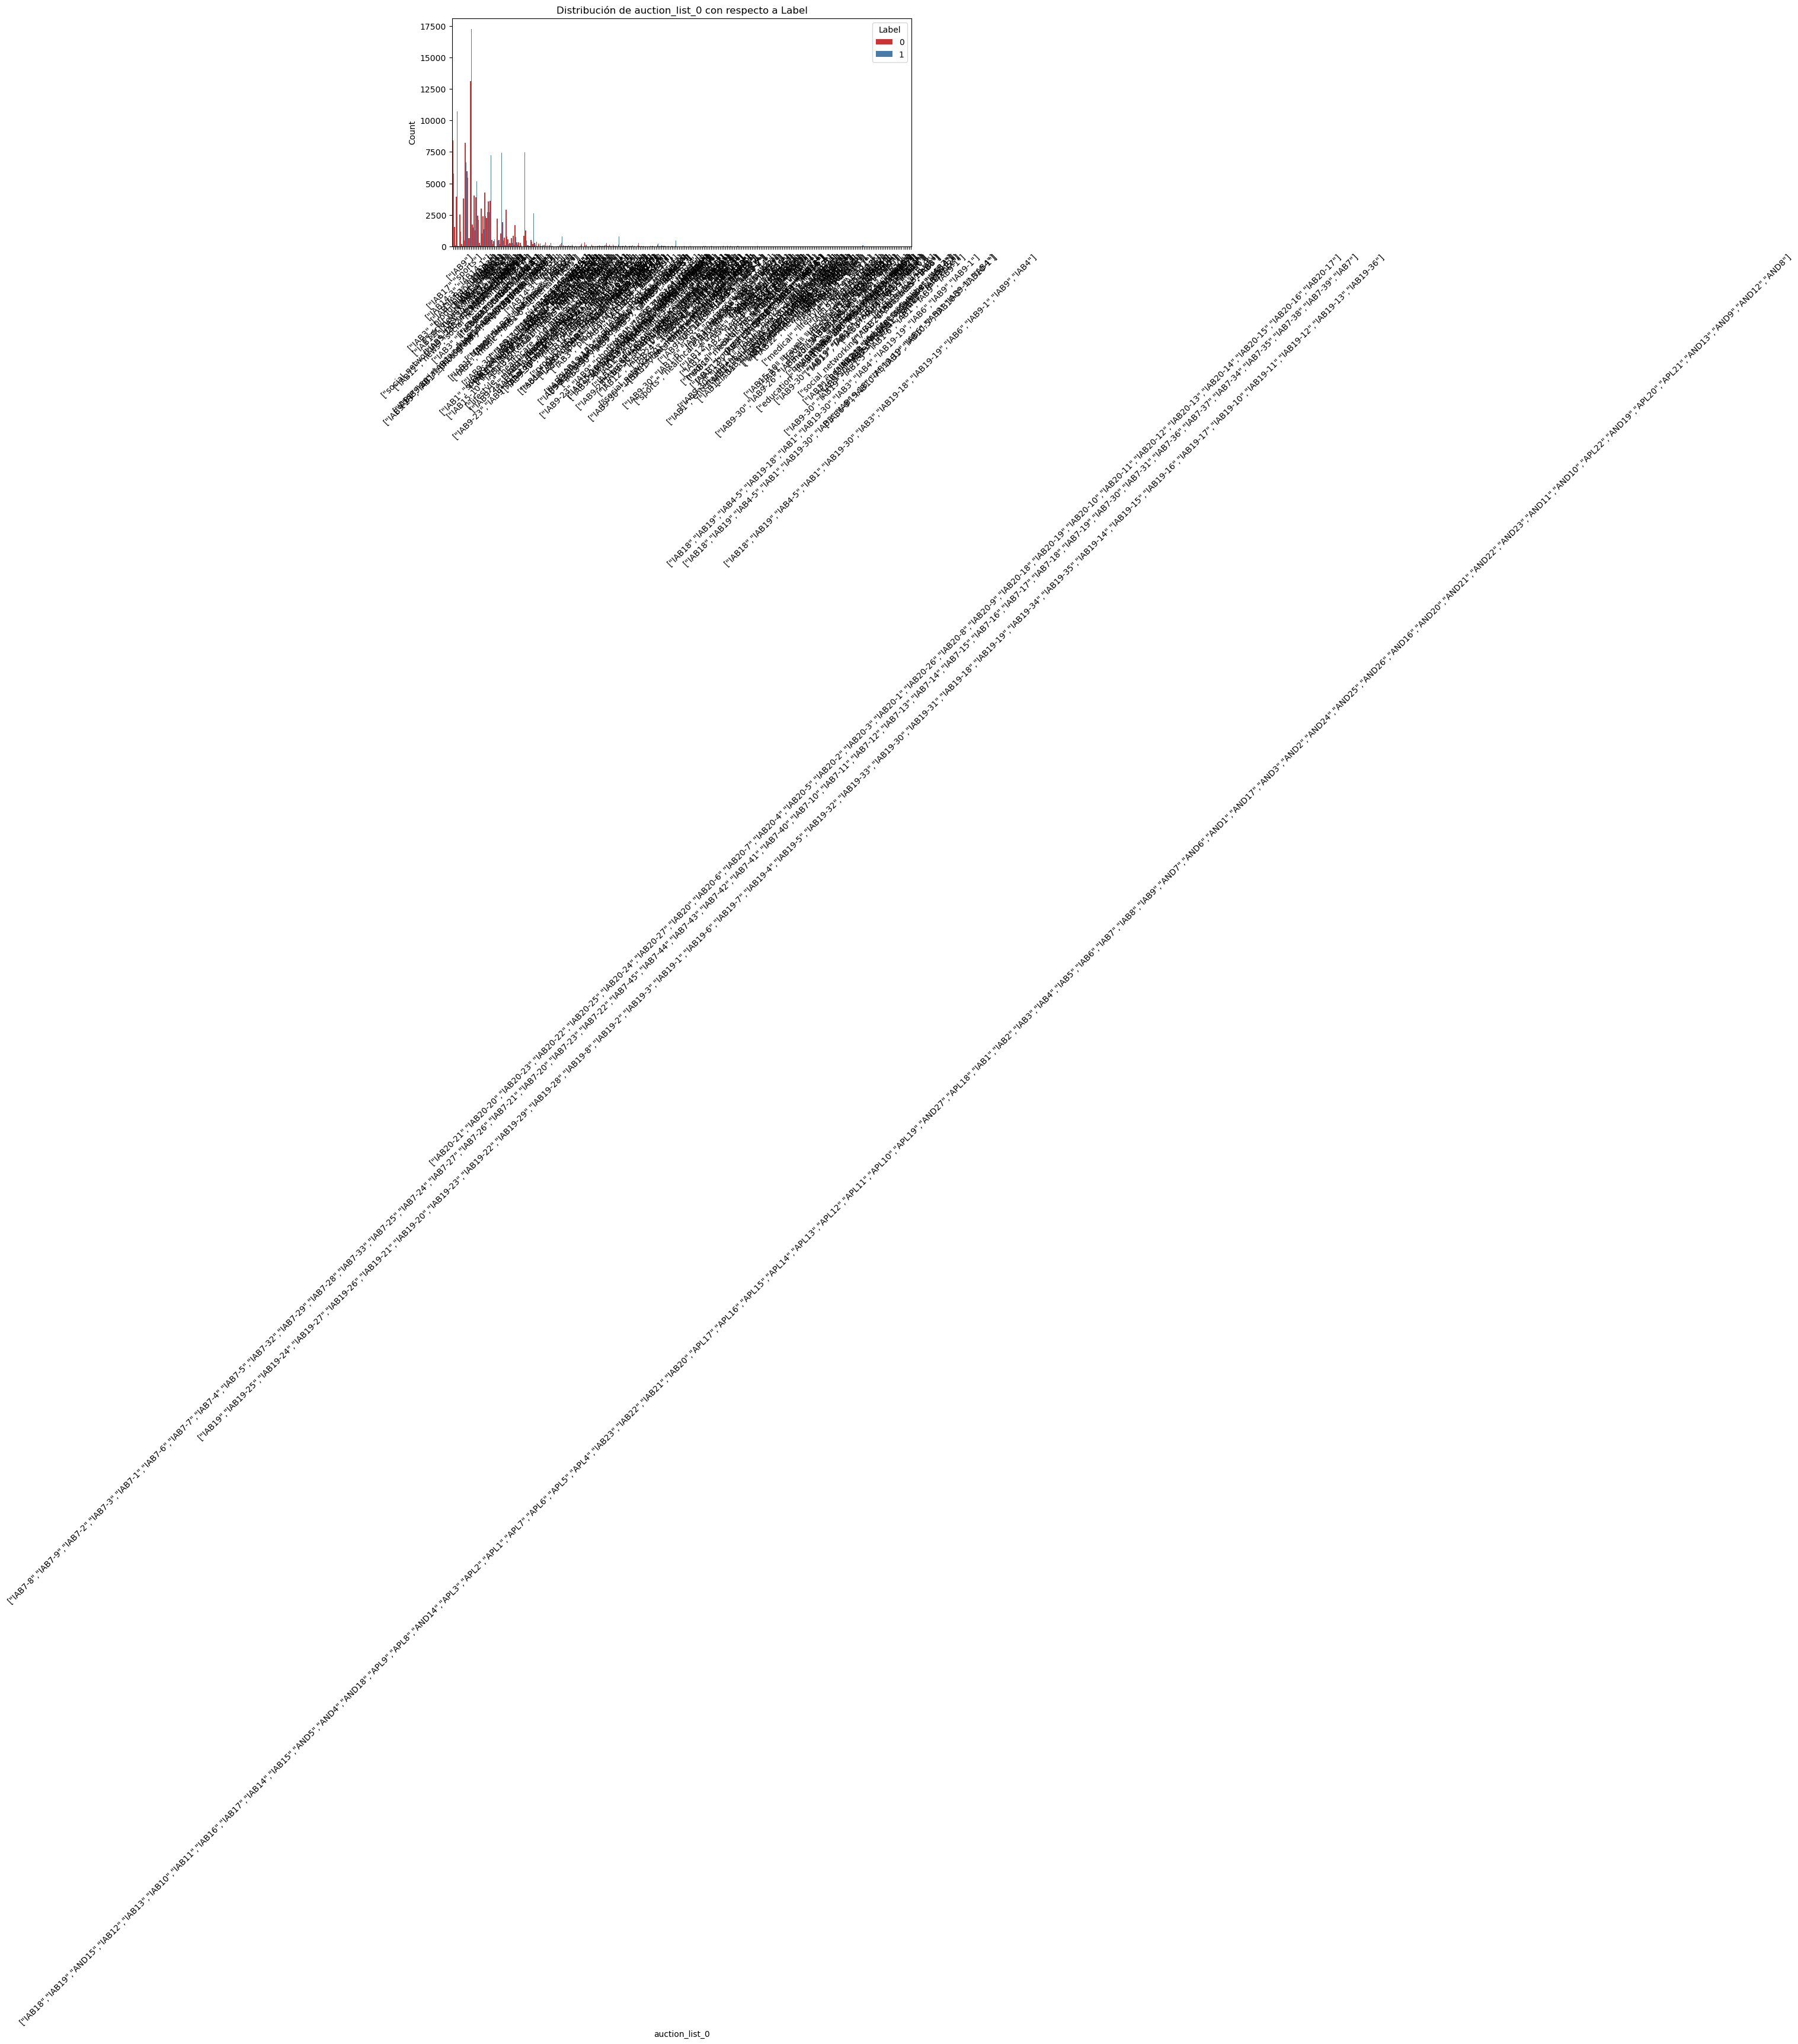

KeyboardInterrupt: 

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'balanced_data' ya está definido y contiene tus datos balanceados
# Definir las variables categóricas que quieres analizar
categorical_vars = [
    'auction_age', 'auction_bidfloor', 'auction_boolean_0', 
    'auction_boolean_1', 'auction_boolean_2', 'auction_categorical_0', 
    'auction_categorical_1', 'auction_categorical_10', 
    'auction_categorical_11', 'auction_categorical_12', 
    'auction_categorical_2', 'auction_categorical_3', 
    'auction_categorical_4', 'auction_categorical_5', 
    'auction_categorical_6', 'auction_categorical_7', 
    'auction_categorical_8', 'auction_categorical_9', 
    'auction_list_0', 'auction_time', 'creative_categorical_0', 
    'creative_categorical_1', 'creative_categorical_10', 
    'creative_categorical_11', 'creative_categorical_12', 
    'creative_categorical_2', 'creative_categorical_3', 
    'creative_categorical_4', 'creative_categorical_5', 
    'creative_categorical_6', 'creative_categorical_7', 
    'creative_categorical_8', 'creative_categorical_9', 
    'creative_height', 'creative_width', 'device_id', 
    'device_id_type', 'gender', 'has_video', 'timezone_offset'
]

# Visualizar la distribución de cada variable categórica con respecto a Label
for var in categorical_vars:
    if var in balanced_data.columns:  # Asegúrate de que la variable esté en el DataFrame
        plt.figure(figsize=(10, 5))
        sns.countplot(data=balanced_data, x=var, hue='Label', palette='Set1')
        plt.title(f'Distribución de {var} con respecto a Label')
        plt.xticks(rotation=45)
        plt.legend(title='Label', loc='upper right')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.show()


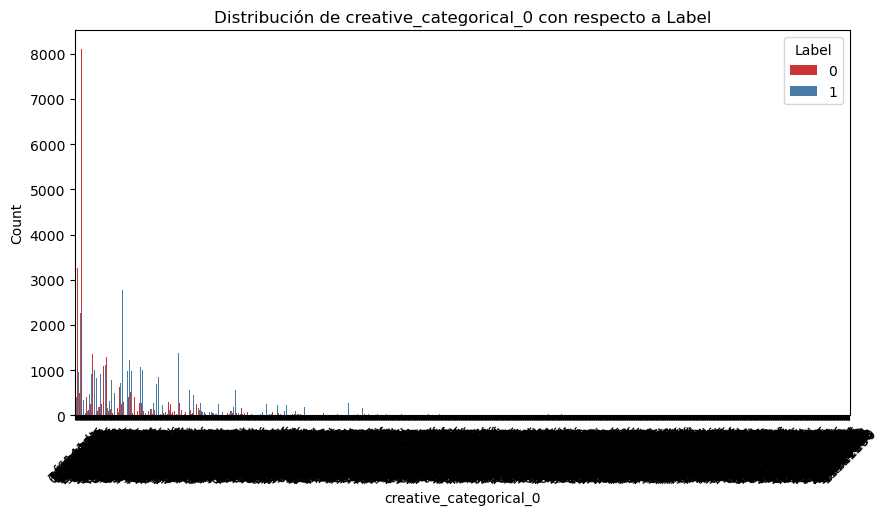

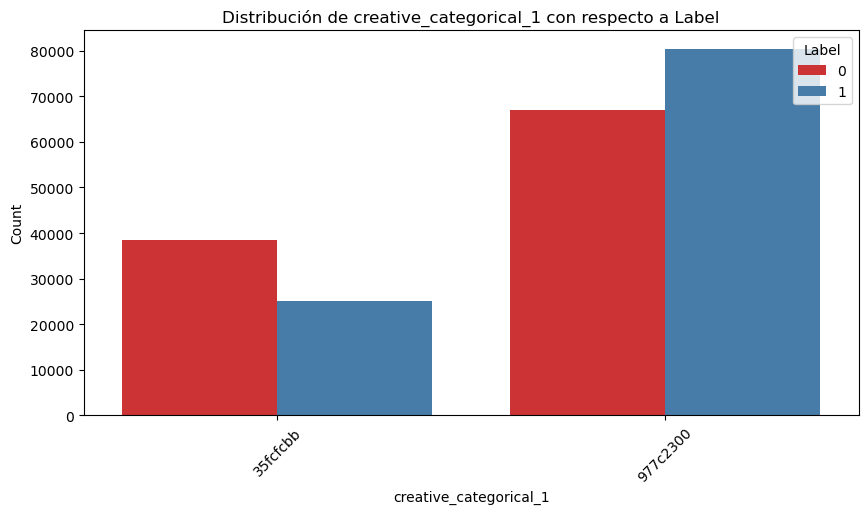

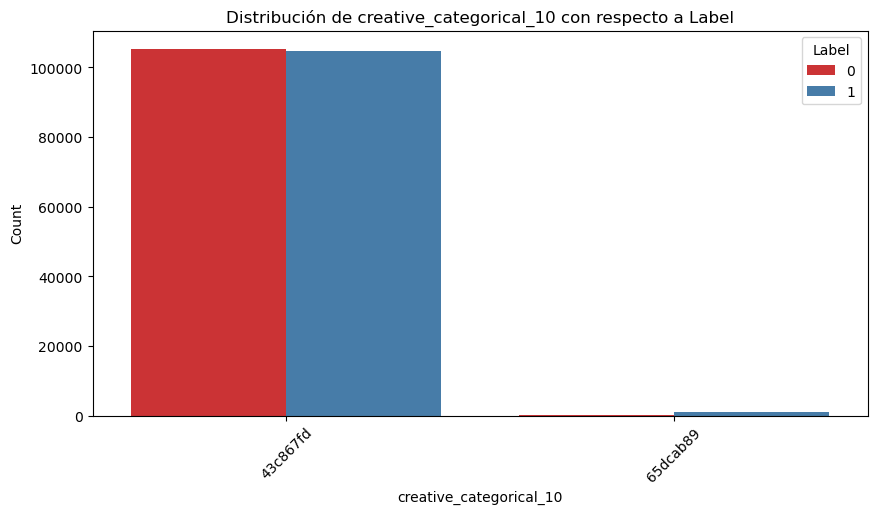

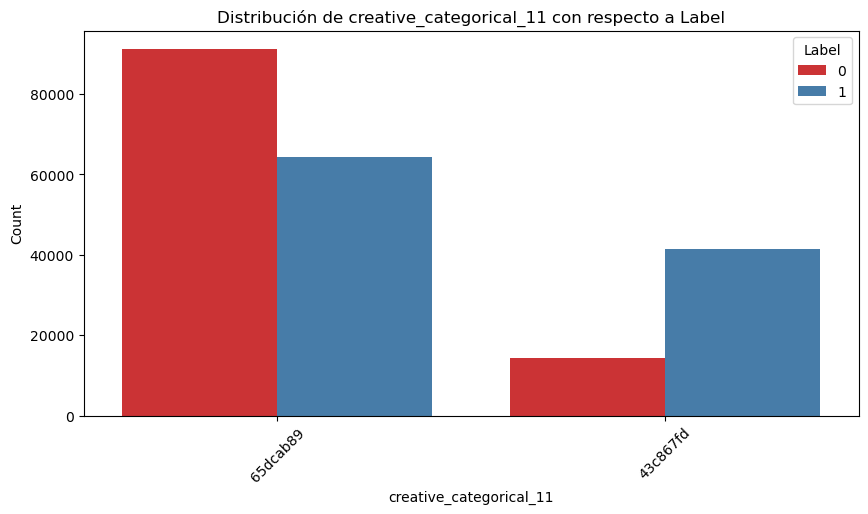

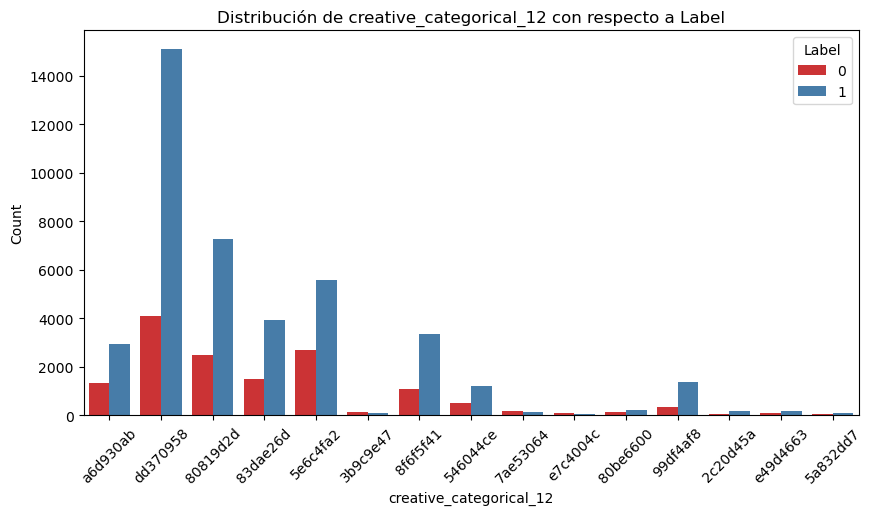

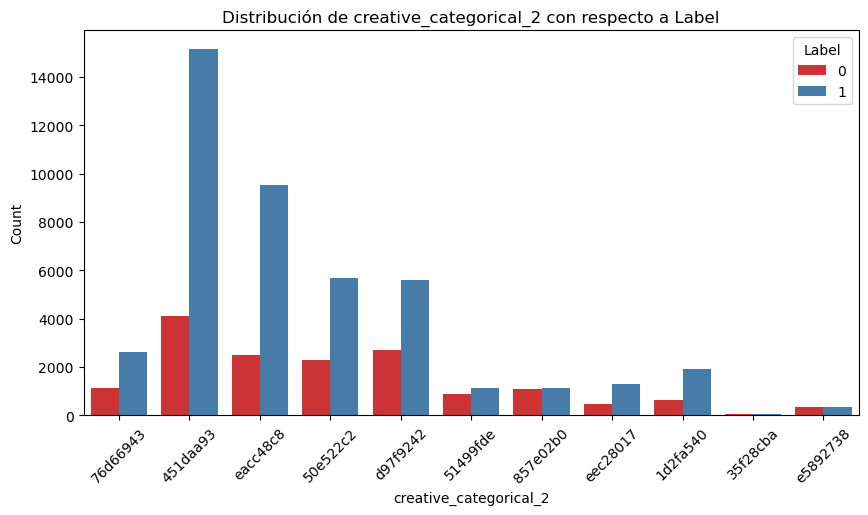

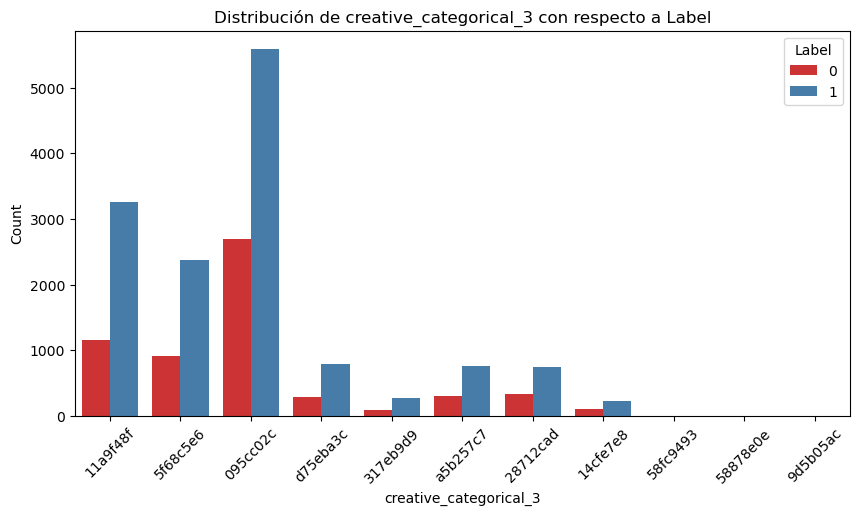

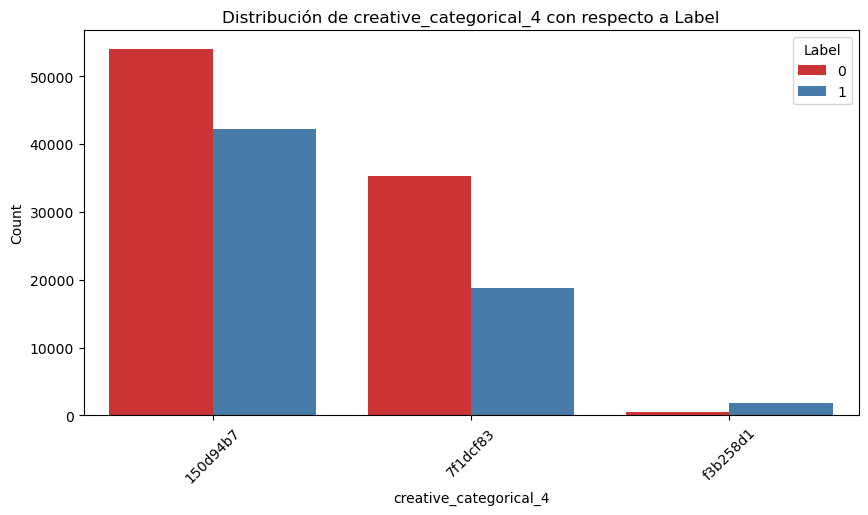

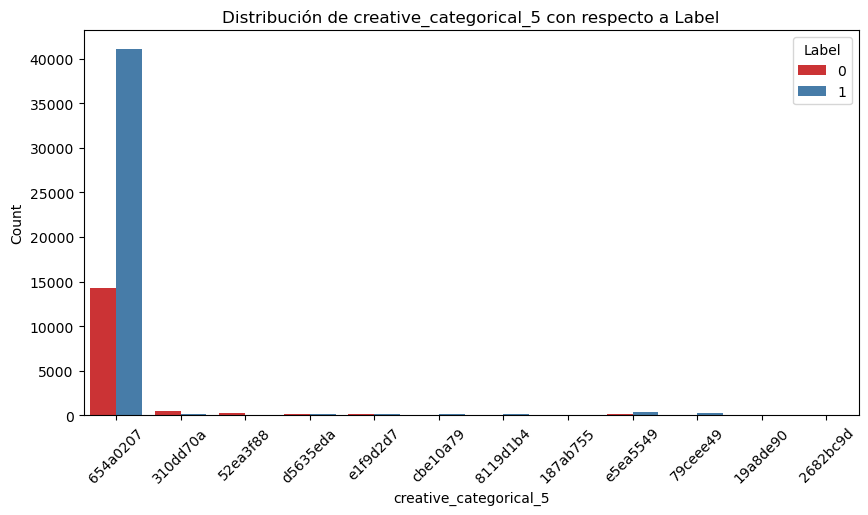

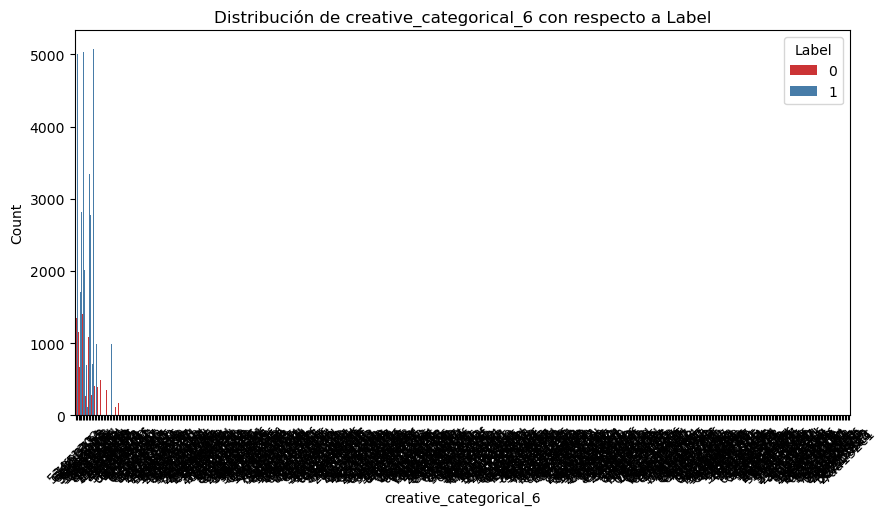

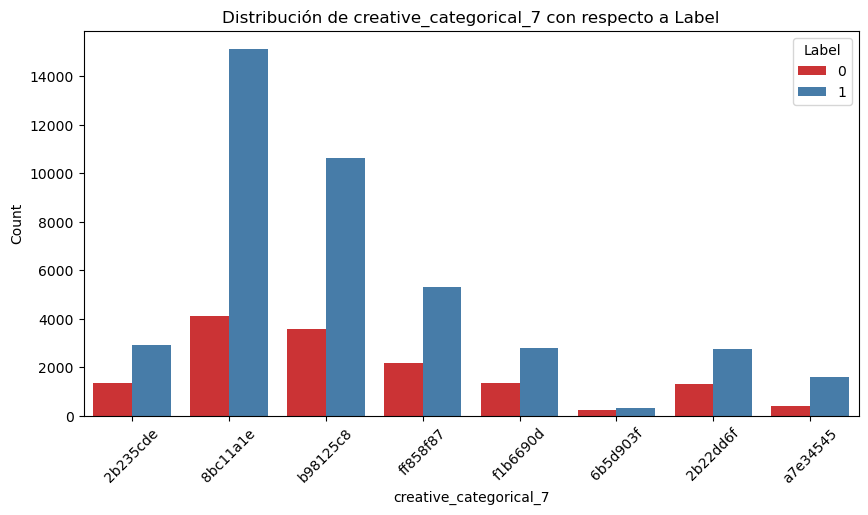

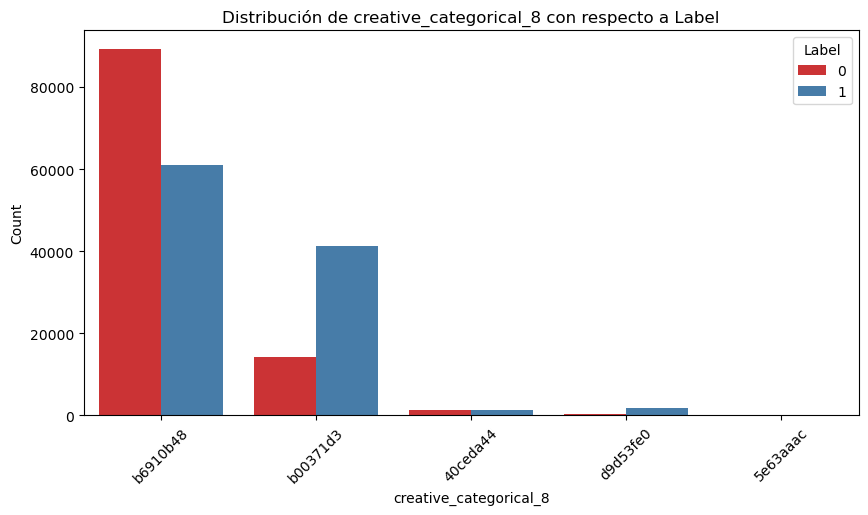

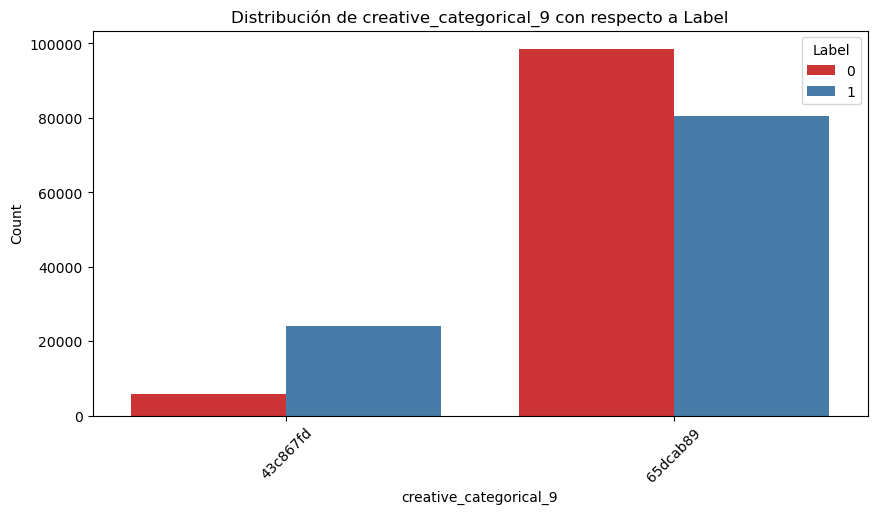

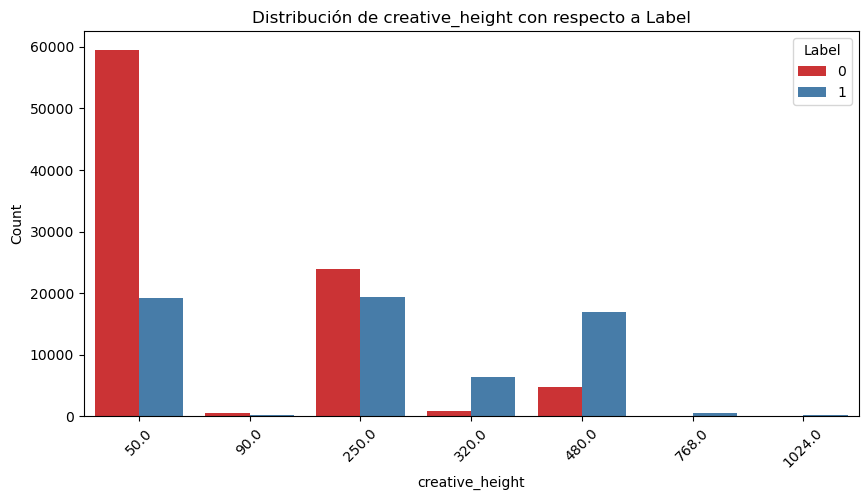

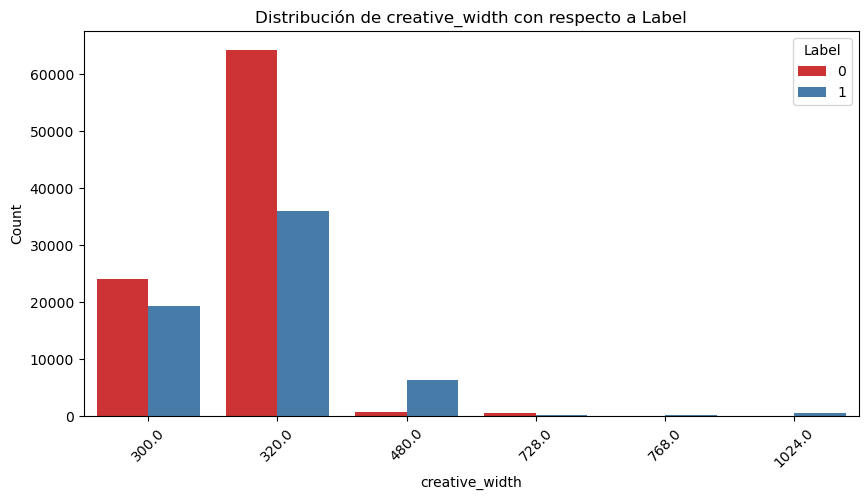

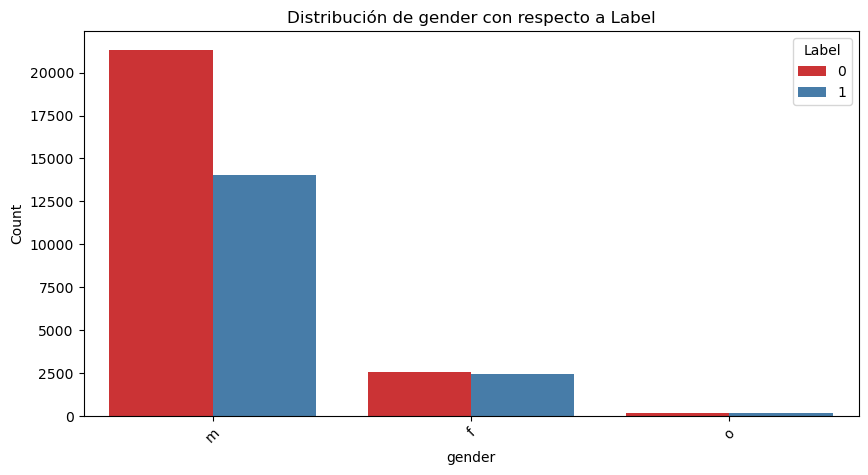

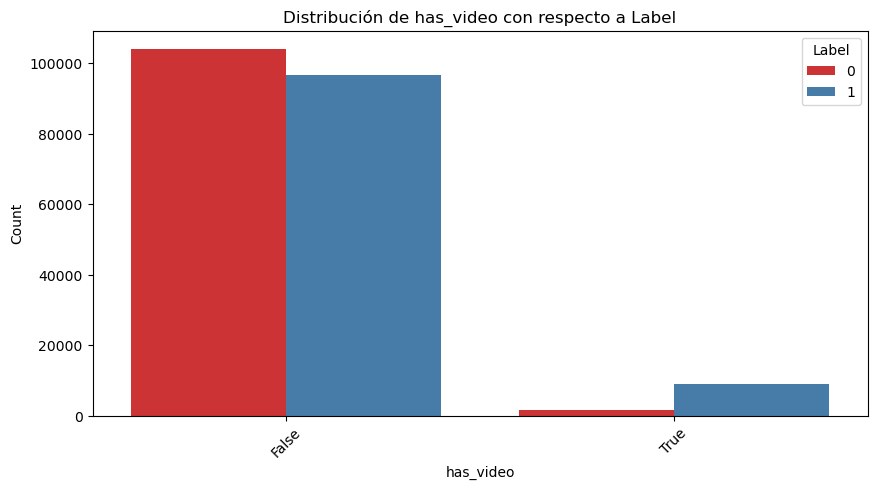

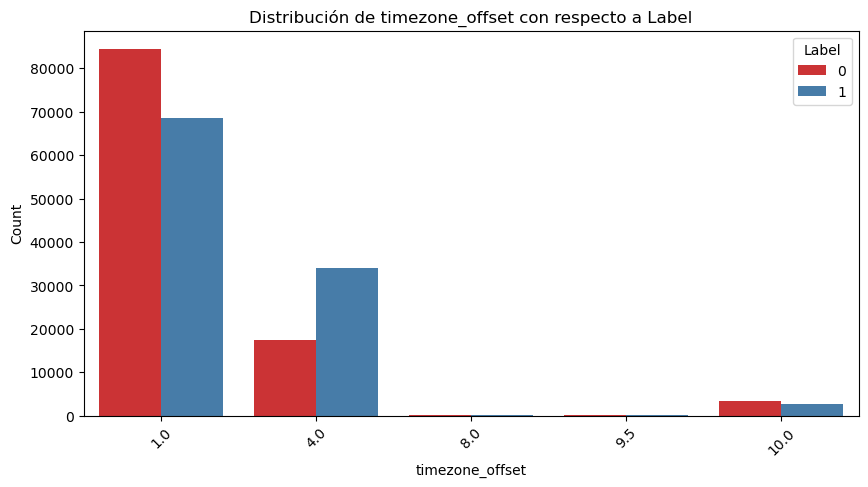

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'balanced_data' ya está definido y contiene tus datos balanceados
# Definir las variables categóricas que quieres analizar
categorical_vars = [ 'creative_categorical_0', 
    'creative_categorical_1', 'creative_categorical_10', 
    'creative_categorical_11', 'creative_categorical_12', 
    'creative_categorical_2', 'creative_categorical_3', 
    'creative_categorical_4', 'creative_categorical_5', 
    'creative_categorical_6', 'creative_categorical_7', 
    'creative_categorical_8', 'creative_categorical_9', 
    'creative_height', 'creative_width', 'gender', 'has_video', 'timezone_offset'
]

# Visualizar la distribución de cada variable categórica con respecto a Label
for var in categorical_vars:
    if var in balanced_data.columns:  # Asegúrate de que la variable esté en el DataFrame
        plt.figure(figsize=(10, 5))
        sns.countplot(data=balanced_data, x=var, hue='Label', palette='Set1')
        plt.title(f'Distribución de {var} con respecto a Label')
        plt.xticks(rotation=45)
        plt.legend(title='Label', loc='upper right')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.show()


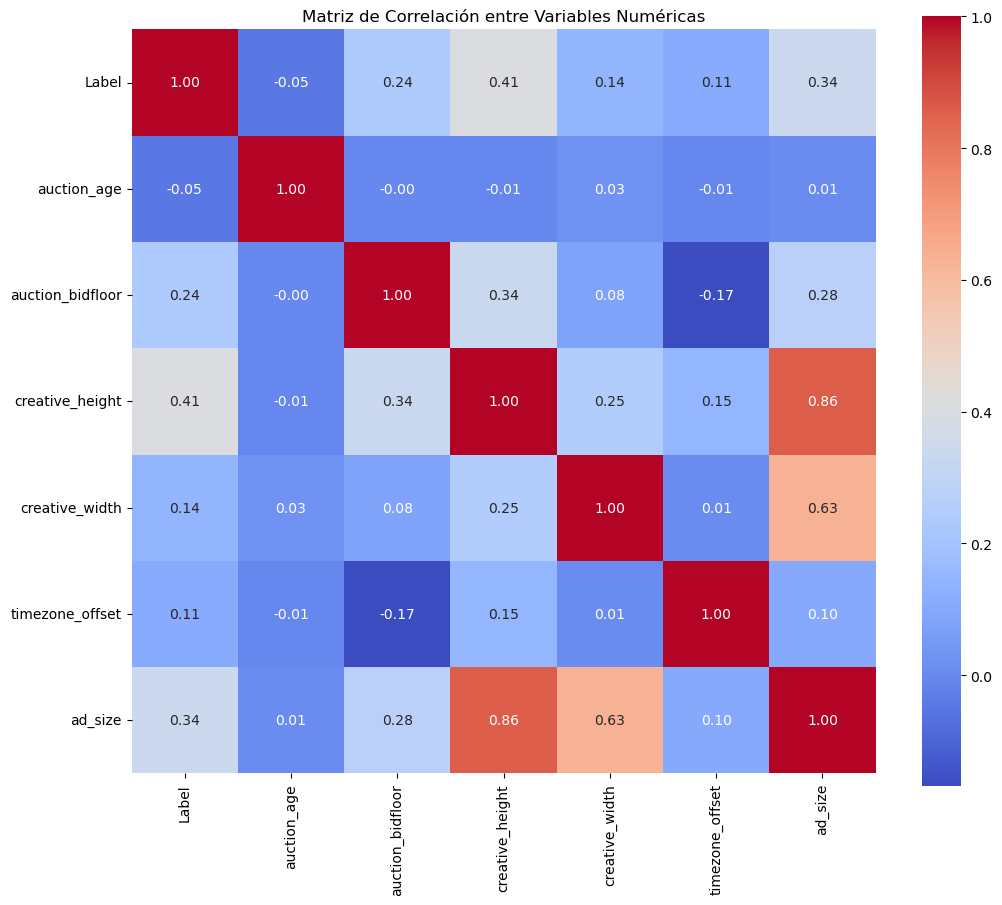

In [49]:
# Filtrar solo las variables numéricas
numerical_vars = balanced_data.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = balanced_data[numerical_vars].corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


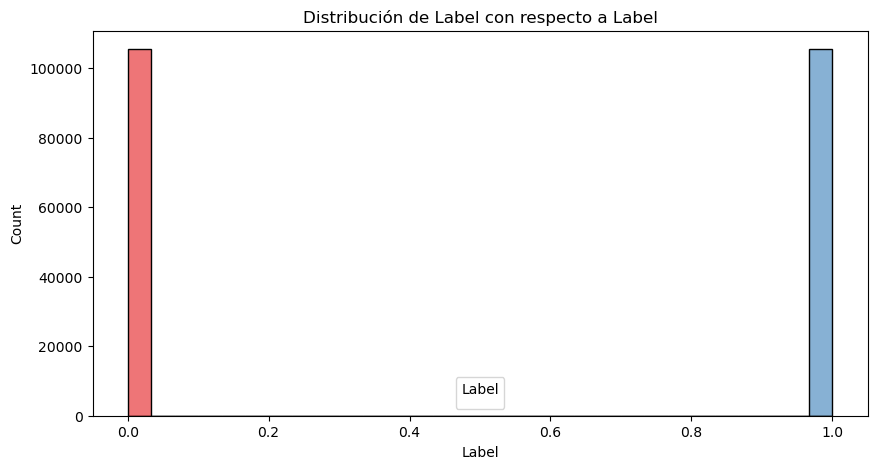

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


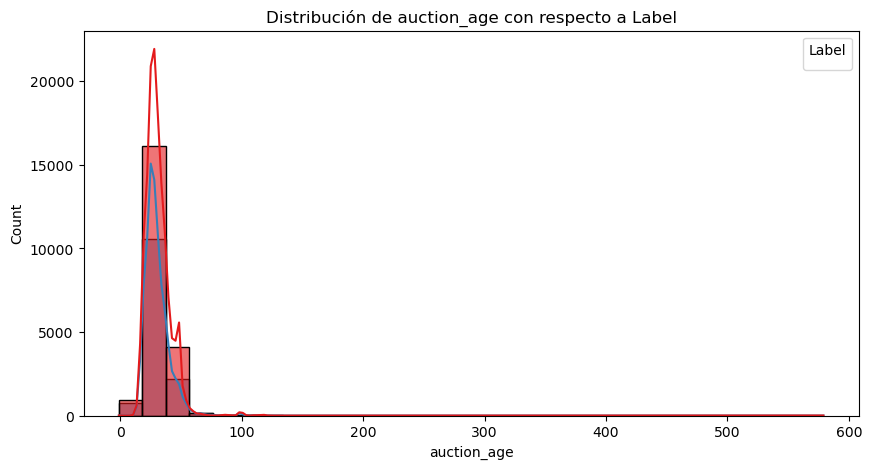

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


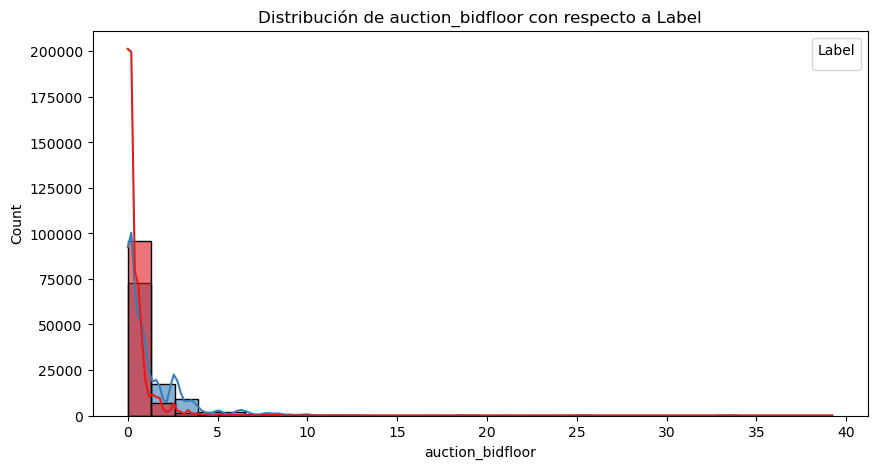

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


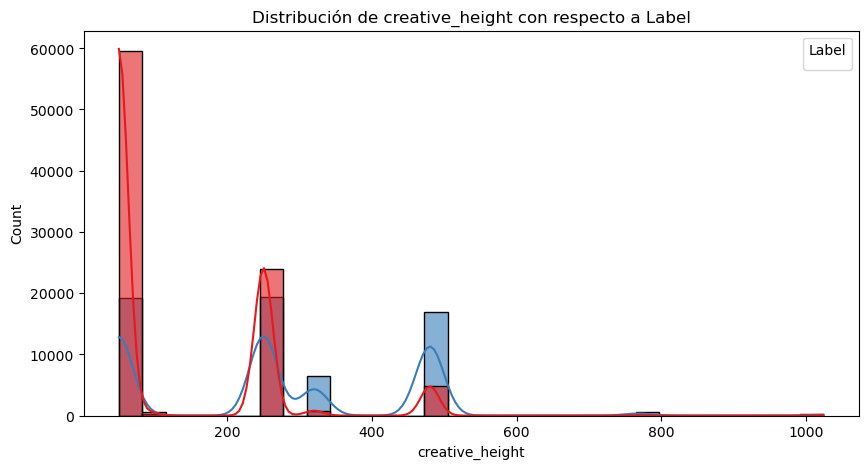

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


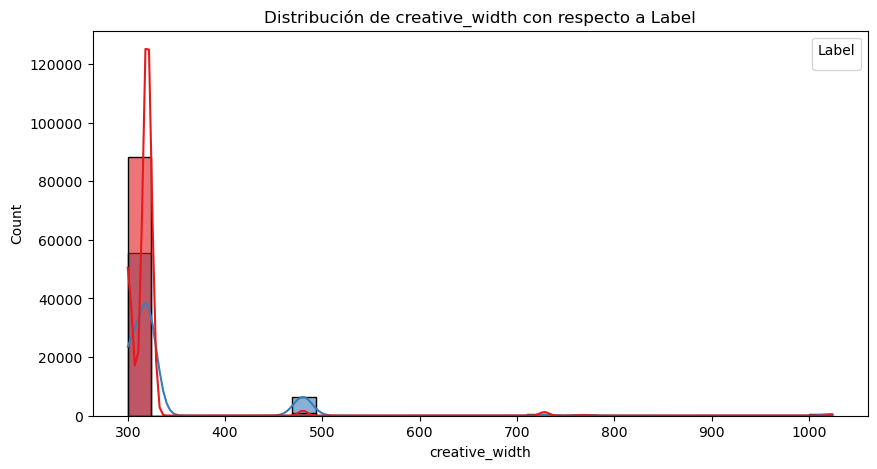

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


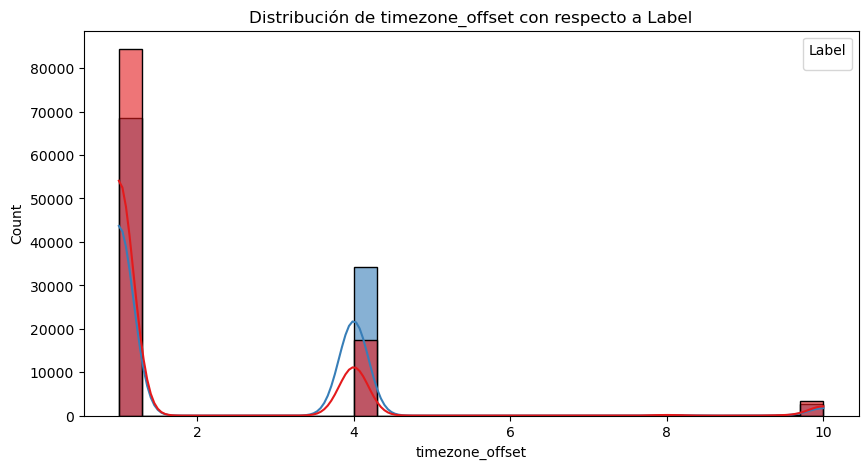

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


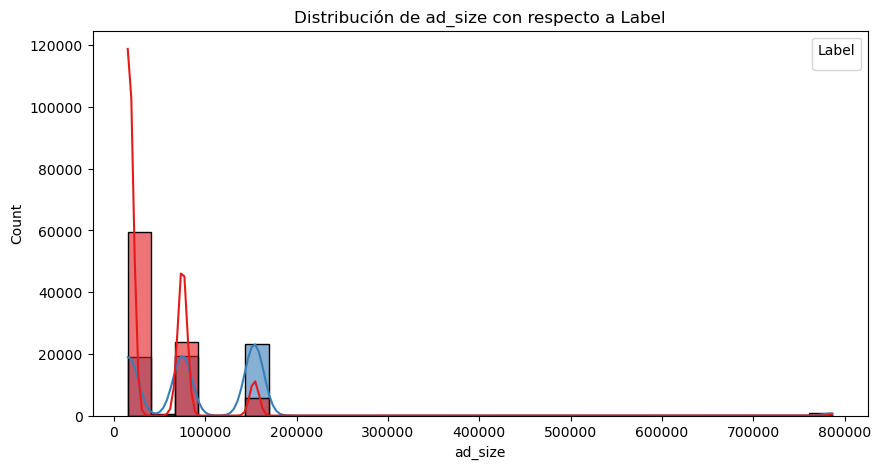

In [50]:
# Visualizar la distribución de las variables numéricas con respecto a Label
for var in numerical_vars:
    if var in balanced_data.columns:  # Asegúrate de que la variable esté en el DataFrame
        plt.figure(figsize=(10, 5))
        sns.histplot(data=balanced_data, x=var, hue='Label', kde=True, bins=30, palette='Set1', alpha=0.6)
        plt.title(f'Distribución de {var} con respecto a Label')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.legend(title='Label')
        plt.show()


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'balanced_data' ya está definido y contiene tus datos balanceados

# Identificar automáticamente las variables numéricas
numerical_vars = balanced_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Visualizar la distribución de cada variable numérica con respecto a Label
for var in numerical_vars:
    if var in balanced_data.columns:  # Asegúrate de que la variable esté en el DataFrame
        plt.figure(figsize=(10, 5))
        
        # Usar un boxplot para visualizar la distribución de la variable numérica
        sns.boxplot(data=balanced_data, x='Label', y=var, palette='Set1')
        
        plt.title(f'Distribución de {var} con respecto a Label')
        plt.xlabel('Label')
        plt.ylabel(var)
        plt.show()
        
        # También puedes usar un histograma superpuesto para comparar
        plt.figure(figsize=(10, 5))
        sns.histplot(data=balanced_data, x=var, hue='Label', multiple='stack', kde=True, palette='Set1')
        
        plt.title(f'Histograma de {var} con respecto a Label')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.legend(title='Label', loc='upper right')
        plt.show()


NameError: name 'balanced_data' is not defined